In [2]:
!pip install faker


                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
     -                                        0.1/2.0 MB 544.7 kB/s eta 0:00:04
     --                                       0.1/2.0 MB 726.2 kB/s eta 0:00:03
     ---                                      0.2/2.0 MB 980.4 kB/s eta 0:00:02
     -----                                    0.3/2.0 MB 1.1 MB/s eta 0:00:02
     -------                                  0.4/2.0 MB 1.2 MB/s eta 0:00:02
     -------                                  0.4/2.0 MB 1.2 MB/s eta 0:00:02
     -------                                  0.4/2.0 MB 1.2 MB/s eta 0:00:02
     ---------                                0.5/2.0 MB 1.1 MB/s eta 0:00:02
     ---------                                0.5/2.0 MB 1.1 MB/s eta 0:00:02
     ---

In [4]:
!pip install prophet


                                              0.0/12.1 MB ? eta -:--:--
                                              0.0/12.1 MB ? eta -:--:--
                                              0.0/12.1 MB ? eta -:--:--
                                              0.0/12.1 MB ? eta -:--:--
                                             0.0/12.1 MB 108.9 kB/s eta 0:01:51
                                             0.0/12.1 MB 151.3 kB/s eta 0:01:20
                                             0.1/12.1 MB 154.0 kB/s eta 0:01:19
                                             0.1/12.1 MB 187.3 kB/s eta 0:01:05
                                             0.1/12.1 MB 245.8 kB/s eta 0:00:49
                                             0.2/12.1 MB 479.2 kB/s eta 0:00:25
     -                                       0.3/12.1 MB 678.1 kB/s eta 0:00:18
     -                                       0.5/12.1 MB 893.0 kB/s eta 0:00:14
     --                                       0.7/12.1 MB 1.2 MB/s eta 0

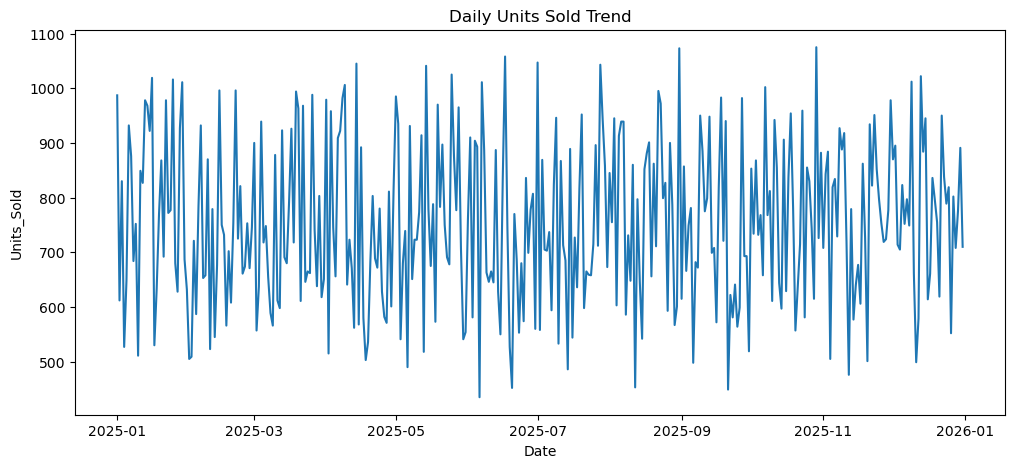

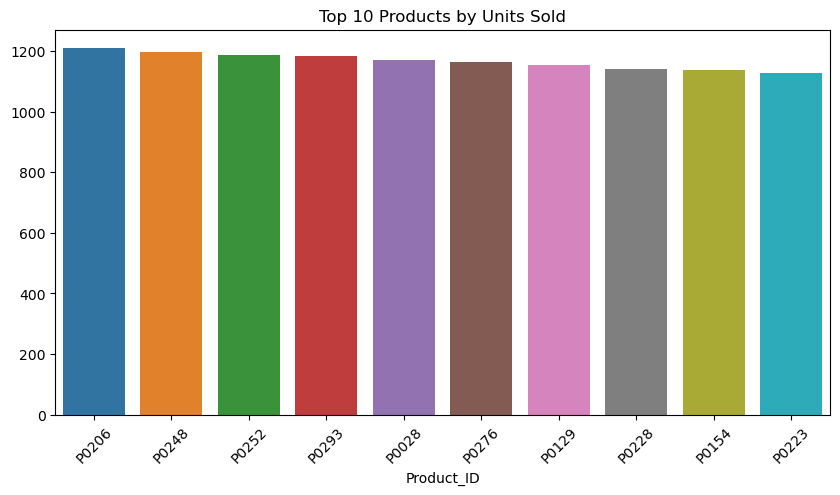

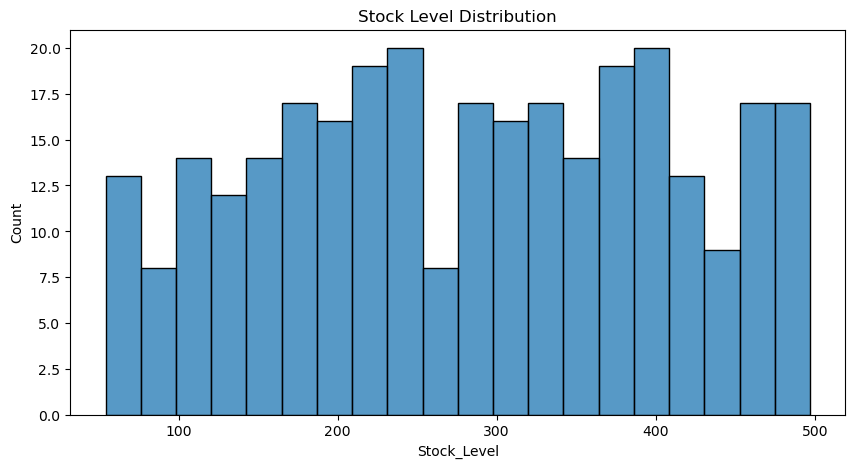

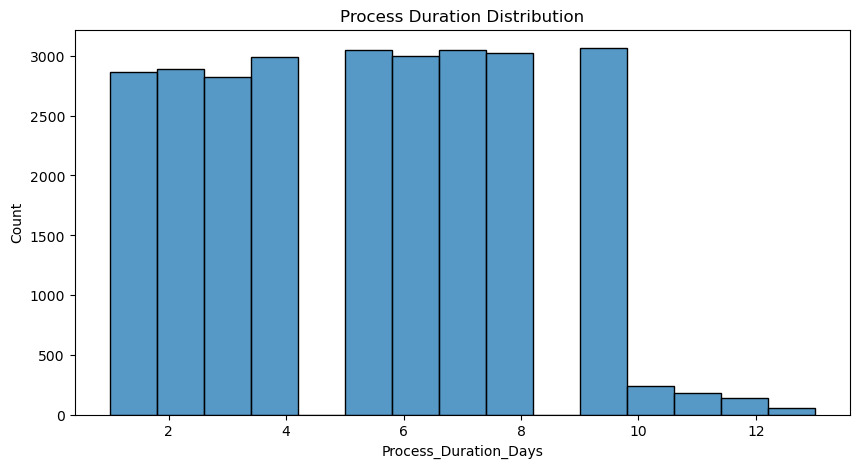

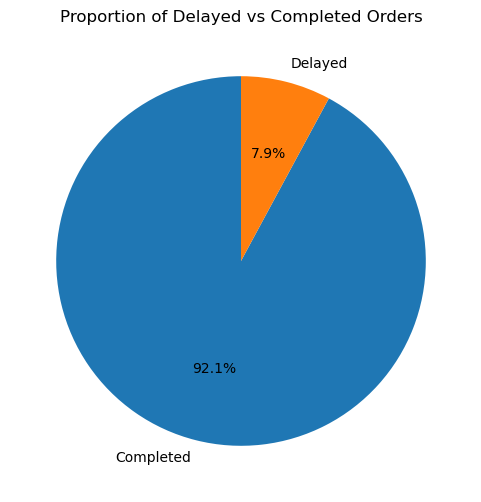

Top 10 Products by Revenue:
             Units_Sold    Revenue
Product_ID                       
P0252             1186  321439.48
P0248             1195  321111.23
P0035             1026  310641.67
P0293             1183  308114.03
P0129             1152  307932.35
P0294             1125  306730.88
P0208             1089  305104.35
P0154             1138  304504.68
P0206             1210  304018.16
P0135             1089  300624.58


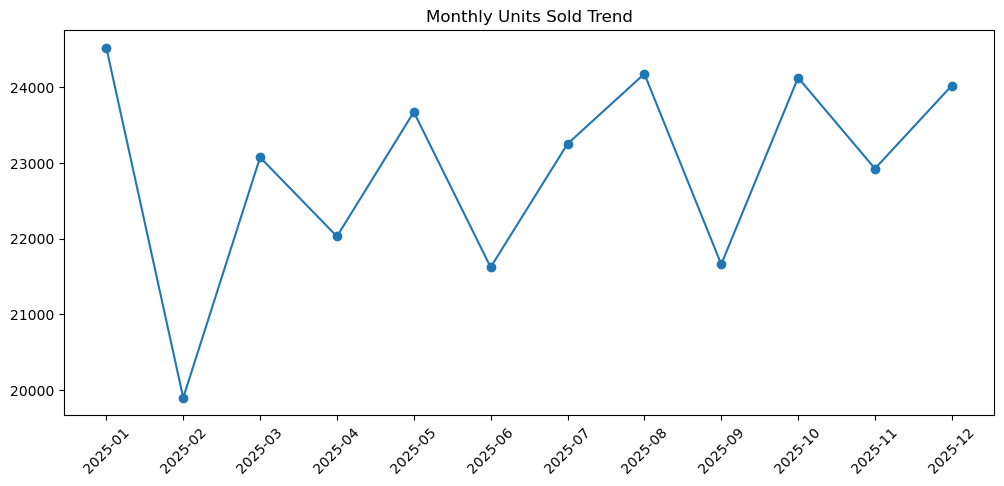

Products at risk of stockout: 7
     Product_ID Product_Category  Stock_Level  Reorder_Level
6        P0007          Apparel           60             71
28       P0029      Electronics           55             93
99       P0100           Sports           70             97
134      P0135      Electronics           62             73
154      P0155   Home & Kitchen           90             95
182      P0183          Apparel           61             83
252      P0253   Home & Kitchen           57             80
Percentage of delayed orders: 7.88%
Average process duration by status:
 Status
Completed    4.997382
Delayed      7.486562
Name: Process_Duration_Days, dtype: float64


18:51:48 - cmdstanpy - INFO - Chain [1] start processing
18:52:01 - cmdstanpy - INFO - Chain [1] done processing


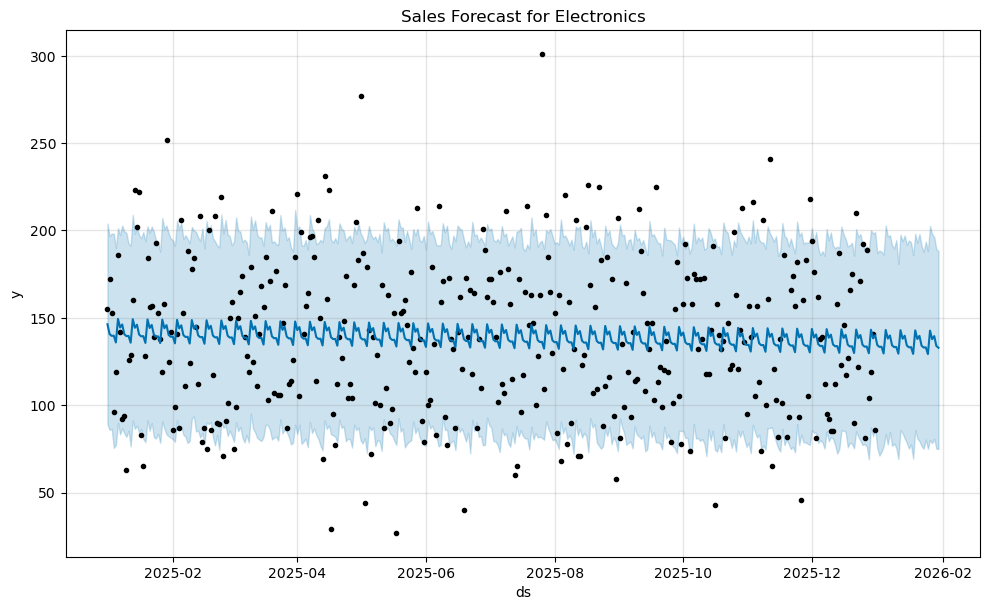

18:52:02 - cmdstanpy - INFO - Chain [1] start processing
18:52:02 - cmdstanpy - INFO - Chain [1] done processing


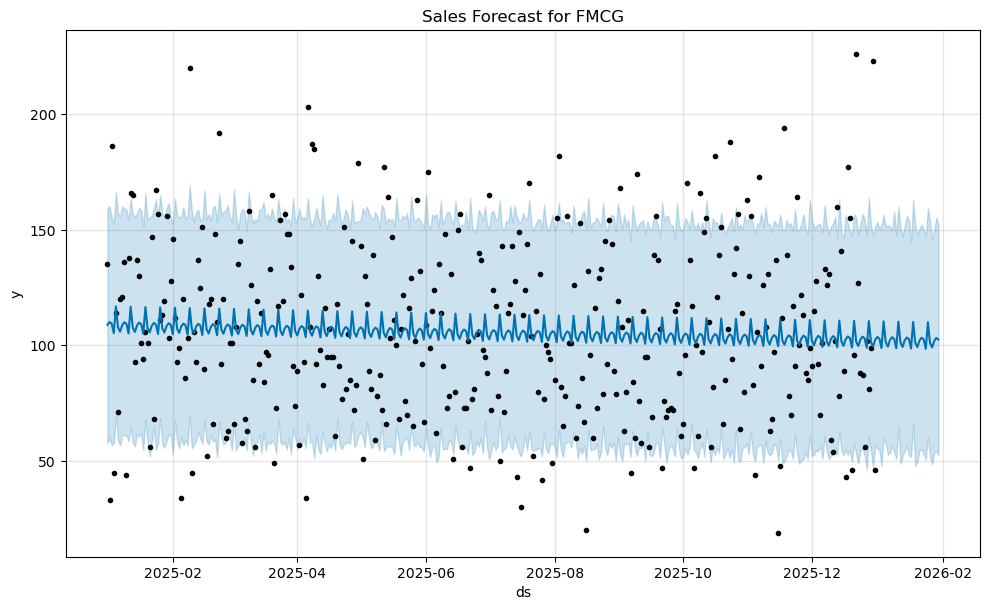

18:52:03 - cmdstanpy - INFO - Chain [1] start processing
18:52:03 - cmdstanpy - INFO - Chain [1] done processing


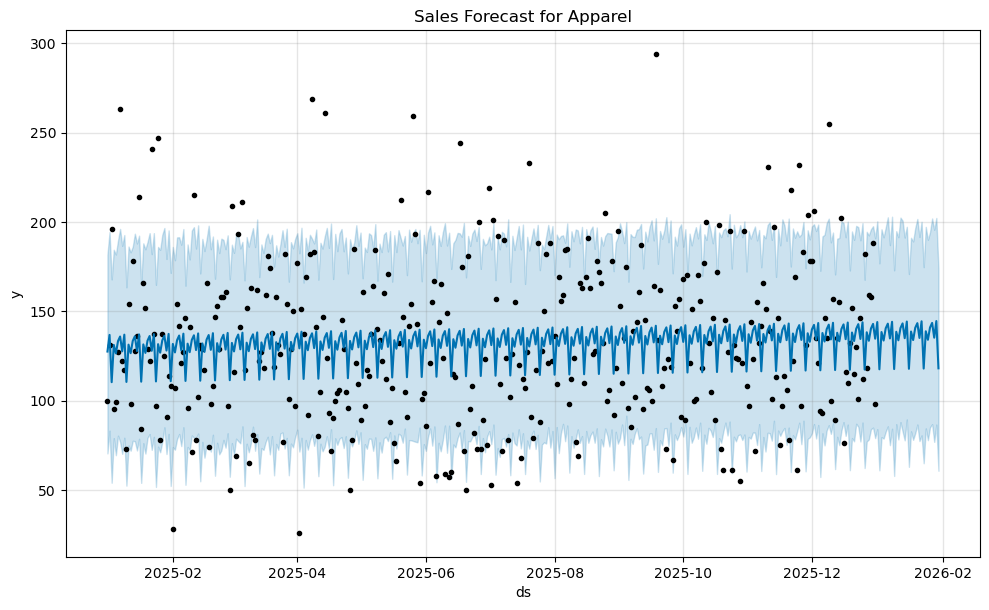

18:52:04 - cmdstanpy - INFO - Chain [1] start processing
18:52:04 - cmdstanpy - INFO - Chain [1] done processing


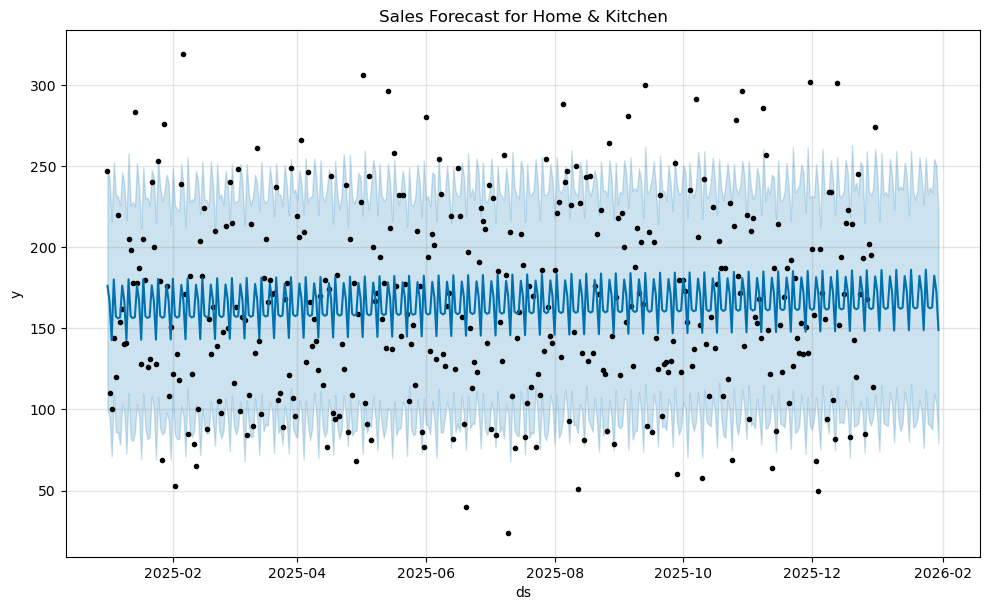

18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] done processing


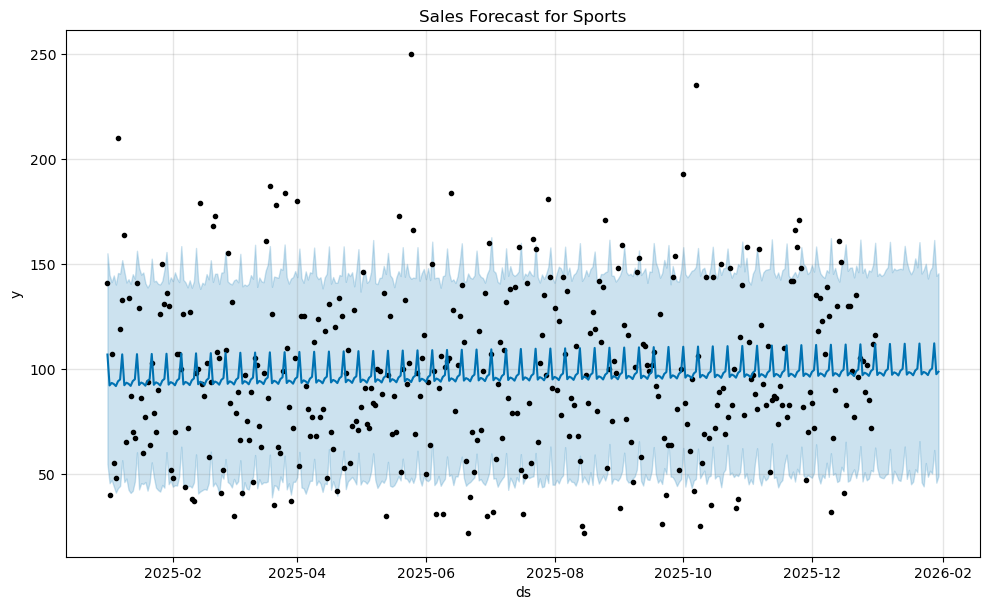

18:52:06 - cmdstanpy - INFO - Chain [1] start processing
18:52:06 - cmdstanpy - INFO - Chain [1] done processing


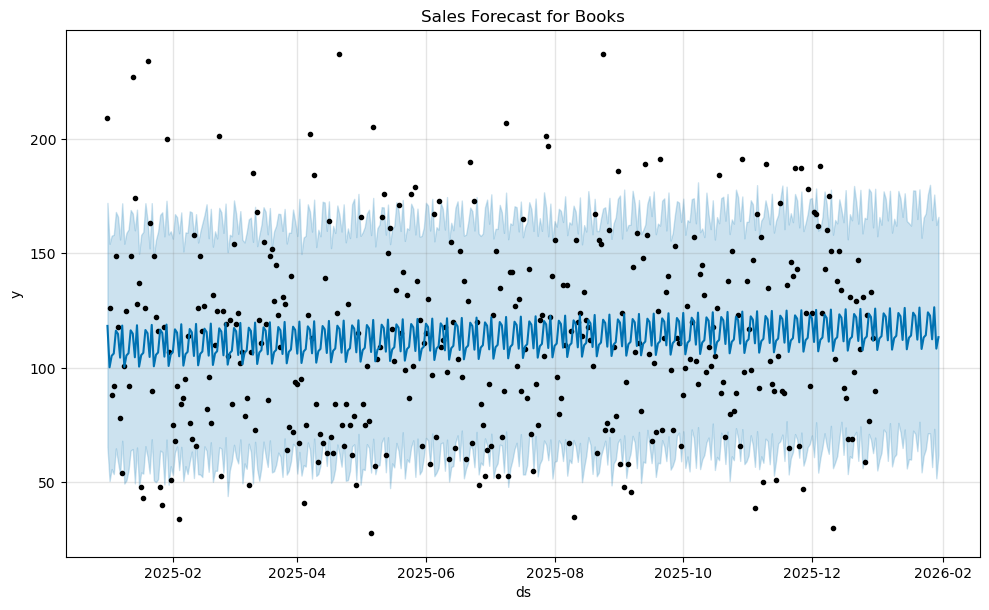

Units sold per store:
 Store_ID
S013    19038
S007    18962
S011    18758
S006    18755
S002    18688
S014    18601
S008    18513
S010    18395
S004    18185
S001    18161
S012    18117
S003    18077
S009    17719
S015    17688
S005    17338
Name: Units_Sold, dtype: int64
Top 10 customers by total spent:
       Customer_ID Customer_Type   Region  Orders_Placed  Total_Spent
11860      C11861     Wholesale    South              8      4999.88
3268       C03269        Retail    North             20      4999.31
101        C00102     Wholesale  Central             36      4999.28
7645       C07646        Retail  Central             19      4999.00
16465      C16466        Retail  Central             39      4998.79
5818       C05819     Wholesale    South             30      4998.55
3260       C03261     Wholesale     West              4      4998.55
5029       C05030        Retail    South             37      4998.18
4750       C04751     Wholesale  Central             41      4998.15
152

In [5]:
# -------------------------------
# 0. IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

fake = Faker()
np.random.seed(42)
random.seed(42)

# -------------------------------
# 1. SIMULATE PRODUCTS AND CATEGORIES
# -------------------------------
num_products = 300
product_ids = [f"P{str(i).zfill(4)}" for i in range(1, num_products+1)]
categories = ['Electronics', 'FMCG', 'Apparel', 'Home & Kitchen', 'Sports', 'Books']
product_categories = np.random.choice(categories, size=num_products)

products_df = pd.DataFrame({
    'Product_ID': product_ids,
    'Product_Category': product_categories
})

# -------------------------------
# 2. SIMULATE SALES DATA
# -------------------------------
num_stores = 15
store_ids = [f"S{str(i).zfill(3)}" for i in range(1, num_stores+1)]
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

sales_rows = []
for date in date_range:
    for _ in range(np.random.randint(50, 100)):
        product = random.choice(product_ids)
        store = random.choice(store_ids)
        units_sold = np.random.randint(1, 20)
        unit_price = round(np.random.uniform(10, 500), 2)
        sales_rows.append([date.strftime("%Y-%m-%d"), product, store, units_sold, unit_price])

sales_df = pd.DataFrame(sales_rows, columns=['Date', 'Product_ID', 'Store_ID', 'Units_Sold', 'Unit_Price'])

# -------------------------------
# 3. SIMULATE INVENTORY DATA
# -------------------------------
inventory_rows = []
for pid, cat in zip(product_ids, product_categories):
    stock_level = np.random.randint(50, 500)
    reorder_level = np.random.randint(20, 100)
    lead_time = np.random.randint(3, 15)
    supplier = fake.company()
    inventory_rows.append([pid, cat, stock_level, reorder_level, lead_time, supplier])

inventory_df = pd.DataFrame(inventory_rows, columns=['Product_ID', 'Product_Category', 'Stock_Level', 
                                                    'Reorder_Level', 'Lead_Time_Days', 'Supplier'])

# -------------------------------
# 4. SIMULATE OPERATIONAL DATA
# -------------------------------
operations_rows = []
order_id = 100000
for idx, row in sales_df.iterrows():
    order_id += 1
    product = row['Product_ID']
    order_date = datetime.strptime(row['Date'], "%Y-%m-%d")
    process_duration = np.random.randint(1, 10)
    if random.random() < 0.08:
        process_duration += np.random.randint(1, 5)
        status = 'Delayed'
    else:
        status = 'Completed'
    delivery_date = order_date + timedelta(days=process_duration)
    operations_rows.append([order_id, product, order_date.strftime("%Y-%m-%d"),
                            delivery_date.strftime("%Y-%m-%d"), process_duration, status])

operations_df = pd.DataFrame(operations_rows, columns=['Order_ID', 'Product_ID', 'Order_Date',
                                                      'Delivery_Date', 'Process_Duration_Days', 'Status'])

# -------------------------------
# 5. SIMULATE CUSTOMER DATA
# -------------------------------
num_customers = 20000
customer_ids = [f"C{str(i).zfill(5)}" for i in range(1, num_customers+1)]
customer_types = ['Retail', 'Wholesale']
regions = ['North', 'South', 'East', 'West', 'Central']

customers_rows = []
for cid in customer_ids:
    c_type = random.choice(customer_types)
    region = random.choice(regions)
    orders_placed = np.random.randint(1, 50)
    total_spent = round(np.random.uniform(100, 5000), 2)
    customers_rows.append([cid, c_type, region, orders_placed, total_spent])

customers_df = pd.DataFrame(customers_rows, columns=['Customer_ID', 'Customer_Type', 'Region', 
                                                    'Orders_Placed', 'Total_Spent'])

# -------------------------------
# 6. DATA CLEANING & PREPROCESSING
# -------------------------------
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
operations_df['Order_Date'] = pd.to_datetime(operations_df['Order_Date'])
operations_df['Delivery_Date'] = pd.to_datetime(operations_df['Delivery_Date'])

sales_df['Revenue'] = sales_df['Units_Sold'] * sales_df['Unit_Price']

# Merge sales with product categories
sales_merged = sales_df.merge(products_df, on='Product_ID')

# -------------------------------
# 7. EXPLORATORY DATA ANALYSIS (EDA)
# -------------------------------
# Daily units sold trend
daily_sales = sales_df.groupby('Date')['Units_Sold'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_sales, x='Date', y='Units_Sold')
plt.title('Daily Units Sold Trend')
plt.show()

# Top 10 products by units sold
top_products = sales_df.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Units Sold')
plt.xticks(rotation=45)
plt.show()

# Stock level distribution
plt.figure(figsize=(10,5))
sns.histplot(inventory_df['Stock_Level'], bins=20)
plt.title('Stock Level Distribution')
plt.show()

# Process duration distribution
plt.figure(figsize=(10,5))
sns.histplot(operations_df['Process_Duration_Days'], bins=15)
plt.title('Process Duration Distribution')
plt.show()

# Delayed vs completed orders
status_counts = operations_df['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Delayed vs Completed Orders')
plt.show()

# -------------------------------
# 8. PREMIUM INSIGHTS & METRICS
# -------------------------------
# 1. Top-selling products & revenue
top_revenue_products = sales_merged.groupby('Product_ID')[['Units_Sold','Revenue']].sum().sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Products by Revenue:\n", top_revenue_products)

# 2. Monthly sales trends
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
monthly_sales = sales_df.groupby('Month')['Units_Sold'].sum().reset_index()
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Units_Sold'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Units Sold Trend')
plt.show()

# 3. Products at risk of stockout
low_stock = inventory_df[inventory_df['Stock_Level'] <= inventory_df['Reorder_Level']]
print(f"Products at risk of stockout: {len(low_stock)}\n", low_stock[['Product_ID','Product_Category','Stock_Level','Reorder_Level']])

# 4. % delayed orders & avg process duration
percent_delayed = len(operations_df[operations_df['Status']=='Delayed']) / len(operations_df) * 100
print(f"Percentage of delayed orders: {percent_delayed:.2f}%")
avg_duration = operations_df.groupby('Status')['Process_Duration_Days'].mean()
print("Average process duration by status:\n", avg_duration)

# 5. Forecast sales per category
for category in categories:
    cat_sales = sales_merged[sales_merged['Product_Category']==category]
    daily_cat_sales = cat_sales.groupby('Date')['Units_Sold'].sum().reset_index().rename(columns={'Date':'ds','Units_Sold':'y'})
    model = Prophet()
    model.fit(daily_cat_sales)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    model.plot(forecast)
    plt.title(f'Sales Forecast for {category}')
    plt.show()

# 6. Store performance
store_sales = sales_df.groupby('Store_ID')['Units_Sold'].sum().sort_values(ascending=False)
print("Units sold per store:\n", store_sales)

# 7. Customer insights
top_customers = customers_df.sort_values(by='Total_Spent', ascending=False).head(10)
print("Top 10 customers by total spent:\n", top_customers)

high_value = customers_df[customers_df['Total_Spent']>customers_df['Total_Spent'].quantile(0.75)]
print(f"High-value customers: {len(high_value)}")

# 8. Category-level analysis
category_summary = sales_merged.groupby('Product_Category')[['Units_Sold','Revenue']].sum().reset_index()
category_summary['Revenue_Percentage'] = category_summary['Revenue']/category_summary['Revenue'].sum()*100
print("Category summary:\n", category_summary)

# 9. Operational bottlenecks (top delayed products)
top_delays = operations_df.groupby('Product_ID')['Process_Duration_Days'].mean().sort_values(ascending=False).head(5)
print("Top 5 delayed products:\n", top_delays)

# 10. Revenue vs stock alignment
revenue_per_product = sales_merged.groupby('Product_ID')['Revenue'].sum().reset_index()
stock_vs_revenue = inventory_df.merge(revenue_per_product, on='Product_ID')
risk_products = stock_vs_revenue[stock_vs_revenue['Stock_Level'] < 50].sort_values(by='Revenue', ascending=False).head(10)
print("High revenue, low stock products:\n", risk_products[['Product_ID','Product_Category','Stock_Level','Revenue']])

# -------------------------------
# 9. EXPORT CLEAN DATA FOR DASHBOARD
# -------------------------------
sales_df.to_csv('sales_clean.csv', index=False)
inventory_df.to_csv('inventory_clean.csv', index=False)
operations_df.to_csv('operations_clean.csv', index=False)
customers_df.to_csv('customers_clean.csv', index=False)

print("All datasets created and insights calculated! Ready for dashboarding.")
